# 주제 : 와인품종분류기
# 목적 : 머신러닝을 통해 데이터를 수집, 학습하여 테스트하기
# 제출처 : 

# 와인품종분류기



In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [14]:
# 학습기 모듈 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\Users\bitcamp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- 사이킷런의 와인데이타셋 이용
- 이탈리아의 같은 지역내의 3개의 다른 경작지에서 재배된 와인의 화학적 분석결과 데이타셋 

In [6]:
from sklearn.datasets import load_wine
wine = load_wine()

In [8]:
type(wine)

sklearn.utils.Bunch

In [9]:
# 데이타프레임 생성
wine_data = pd.DataFrame(wine.data, 
                         columns=wine.feature_names)

# class 컬럼 생성
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
wine_data['class'] = sy
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [10]:
wine_data.shape

(178, 14)

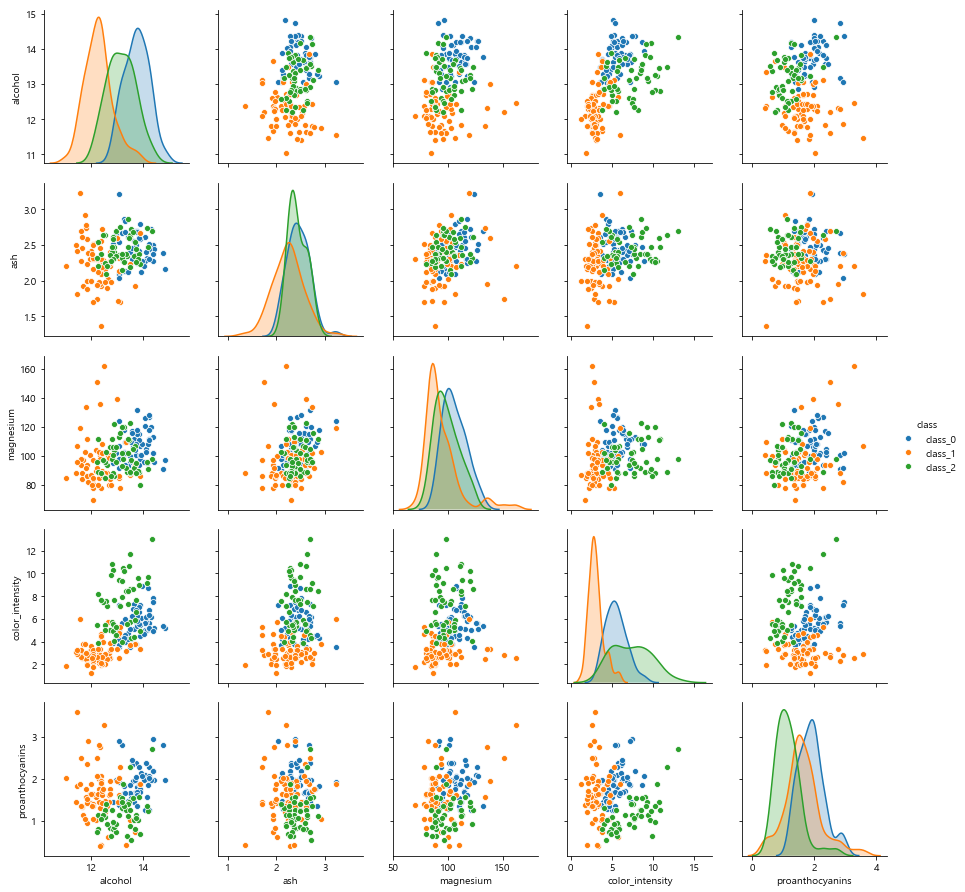

In [26]:
sns.pairplot(vars=["alcohol", "ash", \
                 "magnesium", "color_intensity", "proanthocyanins"], \
             hue="class", data=wine_data)
plt.show()

# 데이타 전처리 

In [27]:
data = wine_data[["alcohol", "ash", \
                 "magnesium", "color_intensity", "proanthocyanins"]]

label = wine_data['class']

In [28]:
data.shape   # 178개 data / column 4개

(178, 5)

In [31]:
data.columns

Index(['alcohol', 'ash', 'magnesium', 'color_intensity', 'proanthocyanins'], dtype='object')

In [29]:
data.head()

,alcohol,ash,magnesium,color_intensity,proanthocyanins
0,14.23,2.43,127.0,5.64,2.29
1,13.20,2.14,100.0,4.38,1.28
2,13.16,2.67,101.0,5.68,2.81
3,14.37,2.50,113.0,7.80,2.18
4,13.24,2.87,118.0,4.32,1.82


### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test \
    = train_test_split(data, label, test_size = 0.2, 
                       train_size = 0.8, 
                       shuffle = True)

In [39]:
x_train.shape, x_test.shape

((142, 5), (36, 5))

In [41]:
x_train.head()

,alcohol,ash,magnesium,color_intensity,proanthocyanins
1,13.20,2.14,100.0,4.380000,1.28
24,13.50,2.61,96.0,3.520000,1.66
171,12.77,2.28,86.0,9.899999,0.64
121,11.56,3.23,119.0,6.000000,1.87
129,12.04,2.38,80.0,2.600000,1.35


In [42]:
x_test.head()

,alcohol,ash,magnesium,color_intensity,proanthocyanins
118,12.77,1.98,80.0,3.40,0.83
127,11.79,2.78,92.0,3.00,1.76
96,11.81,2.74,134.0,2.50,1.56
159,13.48,2.64,89.0,11.75,2.29
48,14.10,2.40,103.0,6.20,2.38


### 데이타 학습  : 모델링

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [43]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 데이터 예측 

In [44]:
y_pred = model_svc.predict(x_test)

In [45]:
y_pred

array(['class_1', 'class_1', 'class_1', 'class_2', 'class_0', 'class_0',
       'class_0', 'class_1', 'class_2', 'class_1', 'class_0', 'class_1',
       'class_1', 'class_0', 'class_0', 'class_1', 'class_0', 'class_0',
       'class_1', 'class_2', 'class_2', 'class_0', 'class_2', 'class_1',
       'class_1', 'class_0', 'class_2', 'class_0', 'class_0', 'class_0',
       'class_1', 'class_0', 'class_0', 'class_1', 'class_1', 'class_0'],
      dtype=object)

### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [51]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(label, model_svc.predict(data))

0.9382022471910112

In [57]:
print("정답률=",accuracy_score(y_test, y_pred))

정답률= 0.8888888888888888
